<a href="https://colab.research.google.com/github/BudiAtu/BudiAtu.github.io/blob/main/sentimen2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [273]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords



from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import  Activation, Dropout, Dense
from keras.layers import  Flatten
from keras.layers import GlobalMaxPooling1D

from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

In [274]:
#input data
data = pd.read_excel('/content/drive/MyDrive/sentiment.xlsx')
data.isnull().values.any()
data.shape


(1005, 2)

In [275]:
#Menampilkan Data 5 baris
data.head()

,content,sentiment
0,Saya baru kemaren instal aplikasi ini langsung...,Negatif
1,Baru diupdate mlah ngelag terus pdahal jaringa...,Negatif
2,Kecewa dengan aplikasinya. Disaat saya ingin b...,Negatif
3,Kiye apik yakin,Positif
4,"Bapak saya mau pesen 3 penumpang, saat pemilih...",Negatif


In [276]:
#contoh menampilkan data attribut dari record 3
data["content"][3]

'Kiye apik yakin'

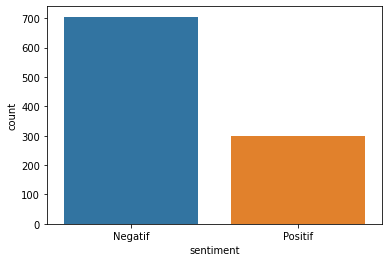

In [277]:
#Seaborn merupakan pustaka visualisasi data 
import seaborn as sns
sns.countplot(x='sentiment', data=data)

In [278]:
#preprosesing data
def preprocess_text(sen):
  #Removing html tags
  sentence = remove_tags(sen)

  #removing punctuation and numbers
  sentence = re.sub('[^a-zA-Z]', ' ', sentence)

  #single character removal
  sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)



  #Removing mutiple spaces
  sentence = re.sub(r'\s+', ' ', sentence)

  return sentence

In [279]:
#eretan karakter yang digunakan untuk pencarian string atau teks dengan menggunakan pola (pattern)
import re
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
  return TAG_RE.sub('', text)

In [280]:
#membuat array list
X = []
sentences = list(data['content'])
for sen in sentences:
  X.append(preprocess_text(sen))

In [281]:
X[0]

'Saya baru kemaren instal aplikasi ini langsung Bisa dibuka Tapi hari ini buka lagi ko ga bisa Cuma muncul layar putih Ditunggu lama banget sampe saya uinstall lalu instal lagi tetep aja kek gini Tolong diperbaiki dong Ga malah memudahkan malah ribet jadinya Kita komplain juga ga malah dibales atau dikasih solusi Mana admin nya ini '

In [282]:
#membuat array dari sentimen data
y = data['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positif" else 0, y)))

In [283]:
#split data untuk membagi data training dan data testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('Data Train : ',X_train)
print('Data Test : ',X_test)

Data Train :  ['Sangat membantu dalam pembelian tiket kereta api tanpa harus antri di loket stasiun mantapppp ', 'Bukanya dipermudah tapi malah dipersulit kecewa berat kenapa akun keluar sendiri padahal tidak saya keluar dan mau masuk lagi super sangat sulit jadi gk bisa berangkat gara gara aplikasi ini kecewa pokoknya harus nya itu dipermudah mana yg harus diperbaiki bukan malah ngirim varifikasi lamanya subhanallahhh TOLONG DIBACA PAK ADMIN APLIKASI perbaiki segera banyak yg memakai ini dan ini aplikasi sangat berpengaruh di kehidupan masyarakat ayolah pak ', 'Untuk metode pembayaran hanya bisa pake mandiri Terus yang ga punya debit mandiri terus melakukan pembatalan uang dikembalikan lewat mana ', 'Verifikasi gaje ajg', 'Ga bisa login Beli di stasiun ga bisa Maksudnya gimana ', 'Sangat membantu ', 'App terpercaya sangat mudah dalam penggunaan Yang tidak bisa coba di cek saat memasukan email jangan sampai salah jangan lupa dikonfirmasi terlebih dahulu di email yang dimasukan tadi kal

In [284]:
#memisahkan teks menjadi potongan-potongan berupa token, bisa berupa potongan huruf, kata, atau kalimat
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [285]:
#adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [286]:
from numpy import array
from numpy import  asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file =open('/content/drive/MyDrive/glove.6B.100d.txt', encoding="utf8")
for line in glove_file:
  records =line.split()
  word = records[0]
  vector_dimensions = asarray(records[1:], dtype='float32')
  embeddings_dictionary[word] = vector_dimensions
glove_file.close()

In [287]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
  embedding_vector = embeddings_dictionary.get(word)
  if embedding_vector is not None:
    embedding_matrix[index] = embedding_vector

In [288]:
#Dekrasi untuk Model CNN
from keras.models import Model
from keras.layers import Conv1D, Dense, MaxPool1D, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

import numpy as np
model = Sequential()

In [289]:
#membangun model CNN
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [290]:
import os
os.mkdir("/content/simpan_model")

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, 100, 100)          231400    
                                                                 
 conv1d_23 (Conv1D)          (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d_16 (Gl  (None, 128)              0         
 obalMaxPooling1D)                                               
                                                                 
 dense_16 (Dense)            (None, 1)                 129       
                                                                 
Total params: 295,657
Trainable params: 64,257
Non-trainable params: 231,400
_________________________________________________________________


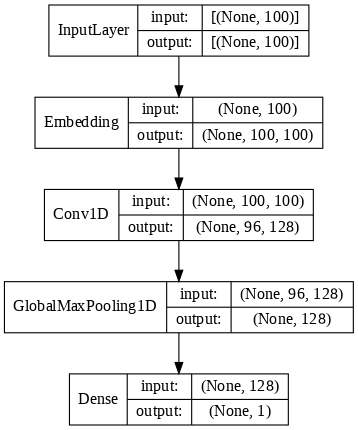

In [291]:
import cv2
import random
import numpy as np

#Menampilkan hasil pembuatan MOdel
model.summary()       
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False, rankdir='TB', expand_nested=False, dpi=80)

In [292]:
#melakukan Training
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=128, epochs=10, verbose=1, validation_split=0.1)
model.save("mymodel.h5")

Epoch 1/10
6/6 [==============================] - 1s 121ms/step - loss: 0.4711 - acc: 0.7524 - val_loss: 0.0940 - val_acc: 1.0000
Epoch 2/10
6/6 [==============================] - 1s 91ms/step - loss: 0.0855 - acc: 0.9986 - val_loss: 0.0274 - val_acc: 1.0000
Epoch 3/10
6/6 [==============================] - 1s 88ms/step - loss: 0.0426 - acc: 0.9986 - val_loss: 0.0147 - val_acc: 1.0000
Epoch 4/10
6/6 [==============================] - 1s 92ms/step - loss: 0.0316 - acc: 0.9986 - val_loss: 0.0102 - val_acc: 1.0000
Epoch 5/10
6/6 [==============================] - 1s 90ms/step - loss: 0.0263 - acc: 1.0000 - val_loss: 0.0080 - val_acc: 1.0000
Epoch 6/10
6/6 [==============================] - 1s 90ms/step - loss: 0.0235 - acc: 1.0000 - val_loss: 0.0067 - val_acc: 1.0000
Epoch 7/10
6/6 [==============================] - 1s 93ms/step - loss: 0.0218 - acc: 1.0000 - val_loss: 0.0059 - val_acc: 1.0000
Epoch 8/10
6/6 [==============================] - 1s 91ms/step - loss: 0.0205 - acc: 1.0000 - va

In [293]:
#testing model
score = model.evaluate(X_train, y_train)
print('Test Accuracy: %f' % (acc*100))

26/26 [==============================] - 0s 11ms/step - loss: 0.0170 - acc: 1.0000
Test Accuracy: 100.000000


In [294]:
# evaluate
score = model.evaluate(X_test, y_test, verbose=1)
print('Test Accuracy: %f' % (acc*100))

7/7 [==============================] - 0s 11ms/step - loss: 0.0215 - acc: 1.0000
Test Accuracy: 100.000000


In [295]:
# Evaluating the model's accuracy
cnn_score = model.evaluate(X_test, y_test, verbose=1)
print("\nTEST SCORES OF MODEL")
print("Test loss:", cnn_score[0])
print("Test Accuracy:", cnn_score[1])

7/7 [==============================] - 0s 12ms/step - loss: 0.0215 - acc: 1.0000

TEST SCORES OF MODEL
Test loss: 0.021503768861293793
Test Accuracy: 1.0


In [296]:
# Final Results
print("Convolution Neural Network")
print("Traning Accuracy : {}" .format(history.history['acc']))
print("Validation Accuracy : {}" .format(history.history['val_acc']))
print("\nTraning Loss : {}" .format(history.history['loss']))
print("Validation Loss : {}" .format(history.history['val_loss']))

Convolution Neural Network
Traning Accuracy : [0.7524204850196838, 0.9986168742179871, 0.9986168742179871, 0.9986168742179871, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Validation Accuracy : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Traning Loss : [0.4710971415042877, 0.08546290546655655, 0.04259398207068443, 0.031587351113557816, 0.026286086067557335, 0.02346673049032688, 0.021818673238158226, 0.02049940451979637, 0.019576717168092728, 0.01878833957016468]
Validation Loss : [0.09397783130407333, 0.027413859963417053, 0.014734026975929737, 0.010152998380362988, 0.0079810107126832, 0.00673753023147583, 0.005912475287914276, 0.005349074490368366, 0.004923721309751272, 0.0045715318992733955]


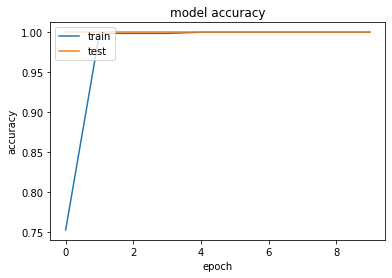

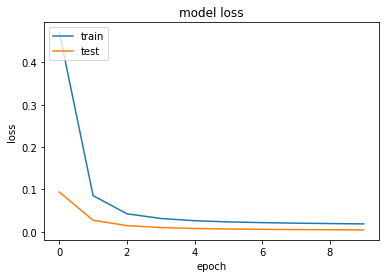

In [297]:
#visualisasi data hasil 

import matplotlib.pyplot as plt
plt.plot(history.history['acc'])

plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [308]:
y_pred=model.predict(X_test)
y_pred

array([[9.24924016e-03],
       [8.20642890e-05],
       [1.09088421e-03],
       [2.02149153e-04],
       [4.99924863e-05],
       [2.86608934e-04],
       [4.82948963e-05],
       [4.12441790e-02],
       [8.81820917e-04],
       [2.95370817e-04],
       [3.93574536e-02],
       [1.01770143e-04],
       [1.15653872e-03],
       [1.57668655e-05],
       [8.01017880e-03],
       [4.95305657e-03],
       [1.08849704e-02],
       [7.27266073e-02],
       [2.54000352e-05],
       [1.71452761e-04],
       [4.51905876e-01],
       [7.49260187e-04],
       [2.25592448e-05],
       [3.60413014e-06],
       [2.29524225e-01],
       [7.02738762e-04],
       [3.66267562e-03],
       [5.59100117e-05],
       [1.49101019e-04],
       [2.27093697e-04],
       [8.18461180e-04],
       [1.30057335e-03],
       [4.84538687e-05],
       [1.02467835e-02],
       [4.51905876e-01],
       [2.66002298e-05],
       [1.92776024e-02],
       [2.75794991e-05],
       [1.59328483e-05],
       [2.32994556e-04],


In [309]:
y_pred=np.argmax(X_test,axis=1)
y_pred

array([ 4,  2,  2, 12, 16, 10,  8,  1,  5, 37,  3, 10,  0,  0,  5,  1,  0,
        3, 10,  5,  0,  3, 20, 17,  2,  6,  2, 30,  9,  0,  0,  4, 17, 12,
        1, 14,  2, 19, 10, 16,  2,  1, 12,  2,  9, 16,  5,  6,  7,  3,  7,
        5,  9,  2,  9,  3, 17, 34,  2, 31,  1,  5, 10,  0,  5,  0, 11,  7,
        5,  1, 14, 13, 14,  2,  0, 10,  2,  0, 14, 10,  7, 15, 30,  6,  6,
        0,  7,  1,  0,  2,  2,  1,  1, 11,  0,  5,  7,  4, 14, 28,  2,  4,
        6,  6,  3, 10,  3,  3,  4,  1,  2,  4, 13,  3,  8, 15,  6,  6, 14,
        6, 22,  4,  1,  3, 26,  1, 20,  3, 11,  4,  6,  5,  2,  0, 59, 12,
       23,  3,  1, 14,  9, 14, 15, 77,  5,  0,  1, 11,  2, 14,  6,  4,  5,
        8, 14,  6,  1,  3, 10, 34, 12,  5,  7, 13, 11,  6,  8,  2,  4,  9,
       21, 16, 16, 20, 35, 11,  3, 17,  7,  4,  7,  1, 12,  1, 13,  4,  8,
        5, 10,  2,  0,  2,  6,  4,  3,  5, 18,  0, 18, 15,  2])

In [300]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

Accuracy : 100.000%
Loss     : 0.010

Classification Report :



Text(33.0, 0.5, 'y_pred')

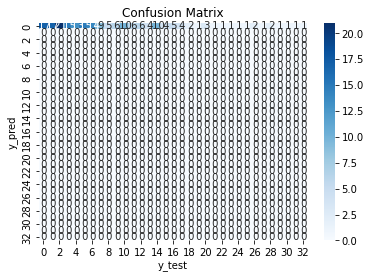

In [301]:
cm=confusion_matrix(y_test,y_pred)
print("Accuracy : {:.3f}%".format(acc*100))
print("Loss     : {:.3f}".format(loss))

print("\nClassification Report :\n")
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [302]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.08      0.16       201
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [303]:
# Getting input from user
print("\nMAKING PREDICTION ON SINGLE INSTANCE USING THREE MODELS THAT WE HAVE BUILT")
reviewNo = int(input("\nEnter the review number whose sentiment is to be predcited"))
reviewText = X[reviewNo]
print("\nCONTENT OF THE REVIEW CHOSEN IS")
print(reviewText)

# Converting text to numeric form
    #Using the tokenizer built earlier
#Since we have trained with a list of reviews and now we are feeding in a string, we need to apply "text_to_word_sequence" before tokenizing
reviewProcessed = tokenizer.texts_to_sequences(reviewText)
print("\nINTERGER SEQUENCE OF THE REVIEW CHOSEN IS")
print(reviewProcessed)

flat_list = []
for sublist in reviewProcessed:
    for item in sublist:
        flat_list.append(item)
#Making the entire items as a single list
flat_list = [flat_list]
#Padding to fit into model
reviewSequence = pad_sequences(flat_list, padding='post', maxlen=maxlen)


MAKING PREDICTION ON SINGLE INSTANCE USING THREE MODELS THAT WE HAVE BUILT

Enter the review number whose sentiment is to be predcited7

CONTENT OF THE REVIEW CHOSEN IS
Udah punya akun mau login kalimatnya aduh timeout Lah ini kai access atau lagu dangdut Kok pake aduh aduh segala Ini keburu mau pesen tiket maaak 

INTERGER SEQUENCE OF THE REVIEW CHOSEN IS
[[], [2201], [], [], [], [1424], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [352], [1740], [], [], [], [], [], [1740], [], [], [], [], [], [], [], [], [2201], [], [], [], [], [1740], [], [], [], [], [], [], [], [], [], [], [1740], [], [1740], [], [], [], [1740], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [352], [], [], [2201], [], [], [352], [2201], [], [], [], [], [], [], [], [1424], [], [], [], [], [], [2201], [], [], [], [], [2201], [], [], [], [], [], [352], [], [], [], [], [1740], [], [1740], [], [], [], [], [], [], [], [], [], [], [], [], [1424], [], [], [], [], [], [], [1740], [], [], [],